In [1]:
#https://github.com/colebryant/mhealth-classification/blob/master/CNNModeling.ipynb

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#reading data
df = pd.read_csv('D:/HAR/mhealth/mhealth_full.csv')
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [5]:
df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity', 'subject'],
      dtype='object')

    0: 'Null',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'

In [6]:
df_activity_1 = df[df['activity'] == 1]
df_activity_2 = df[df['activity'] == 2]
df_activity_3 = df[df['activity'] == 3]
df_activity_4 = df[df['activity'] == 4]
df_activity_5 = df[df['activity'] == 5]
df_activity_6 = df[df['activity'] == 6]
df_activity_7 = df[df['activity'] == 7]
df_activity_8 = df[df['activity'] == 8]
df_activity_9 = df[df['activity'] == 9]
df_activity_10 = df[df['activity'] == 10]
df_activity_11 = df[df['activity'] == 11]
df_activity_12 = df[df['activity'] == 12]

In [7]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3,            
                df_activity_4, df_activity_5, df_activity_6, df_activity_7,
                df_activity_8, df_activity_9, df_activity_10, df_activity_11,df_activity_12])

In [8]:
df.activity.value_counts()

1     30720
2     30720
3     30720
4     30720
5     30720
9     30720
10    30720
11    30720
7     29441
8     29337
6     28315
12    10342
Name: activity, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity']=le.fit_transform(df['activity'])

In [10]:
df.activity.value_counts()

0     30720
1     30720
2     30720
3     30720
4     30720
8     30720
9     30720
10    30720
6     29441
7     29337
5     28315
11    10342
Name: activity, dtype: int64

In [11]:
X = df.drop(['activity', 'subject'], axis=1)
y = df['activity']

In [12]:
X.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z'],
      dtype='object')

In [13]:
# Scale full set of predictors
X_scaled = StandardScaler().fit_transform(X)

In [14]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((257396, 21), (85799, 21), (257396,), (85799,))

In [16]:
# Scale train/ test predictors based on training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Reformat the training data into sequence samples
# Source: https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [18]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train_scaled, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test_scaled, y_test_array]

In [19]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity. 

X_train_seq, y_train_seq = split_sequences(train_set, 25)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, 25)
print(X_test_seq.shape, y_test_seq.shape)

(257372, 25, 21) (257372,)
(85775, 25, 21) (85775,)


In [20]:
# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)


(257372, 12)
(85775, 12)


In [21]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

25 21 12


In [22]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               76800     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 94,860
Trainable params: 94,860
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit model on training data with 10 epochs
model.fit(X_train_seq, y_train_seq, epochs=10)

Epoch 1/10
8043/8043 [==============================] - 151s 18ms/step - loss: 0.4240 - accuracy: 0.8512
Epoch 2/10
8043/8043 [==============================] - 137s 17ms/step - loss: 0.1763 - accuracy: 0.9352
Epoch 3/10
8043/8043 [==============================] - 136s 17ms/step - loss: 0.1319 - accuracy: 0.9519
Epoch 4/10
8043/8043 [==============================] - 138s 17ms/step - loss: 0.1115 - accuracy: 0.9595
Epoch 5/10
8043/8043 [==============================] - 139s 17ms/step - loss: 0.0959 - accuracy: 0.9647
Epoch 6/10
8043/8043 [==============================] - 139s 17ms/step - loss: 0.0871 - accuracy: 0.9684
Epoch 7/10
8043/8043 [==============================] - 139s 17ms/step - loss: 0.0806 - accuracy: 0.9708
Epoch 8/10
8043/8043 [==============================] - 139s 17ms/step - loss: 0.0746 - accuracy: 0.9728
Epoch 9/10
8043/8043 [==============================] - 141s 18ms/step - loss: 0.0711 - accuracy: 0.9740
Epoch 10/10
8043/8043 [==============================] 

In [25]:
# Evaluate model against test data
_, accuracy = model.evaluate(X_test_seq, y_test_seq)
print(accuracy)

2681/2681 [==============================] - 29s 10ms/step - loss: 0.0315 - accuracy: 0.9887
0.9886680245399475


In [28]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {        
        0: 'Standing still',
        1: 'Sitting and relaxing',
        2: 'Lying down',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

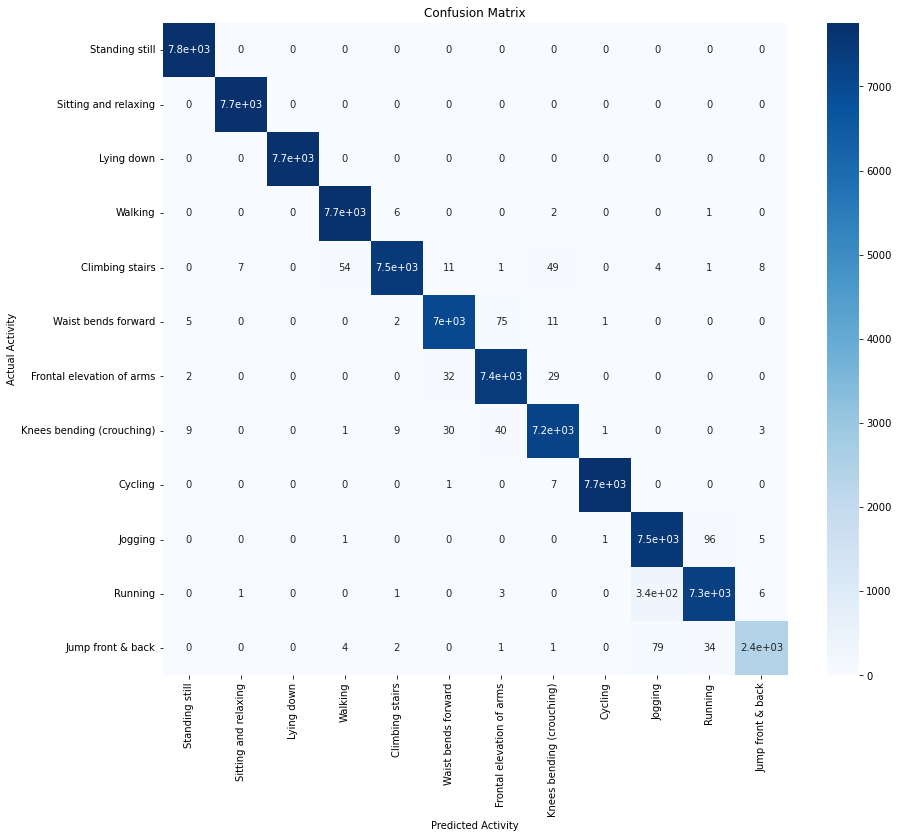

Accuracy Score: 98.8668%
Precision Score: 98.8882%
Recall Score: 98.6573%
F_1 Score: 98.7639%


In [32]:
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model

results_summarizer(y_test[24:], y_pred)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test[24:], y_pred))
print('*'*50)
print(confusion_matrix(y_test[24:], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7753
           1       1.00      1.00      1.00      7696
           2       1.00      1.00      1.00      7674
           3       0.99      1.00      1.00      7696
           4       1.00      0.98      0.99      7599
           5       0.99      0.99      0.99      7144
           6       0.98      0.99      0.99      7453
           7       0.99      0.99      0.99      7294
           8       1.00      1.00      1.00      7694
           9       0.95      0.99      0.97      7612
          10       0.98      0.95      0.97      7636
          11       0.99      0.95      0.97      2524

    accuracy                           0.99     85775
   macro avg       0.99      0.99      0.99     85775
weighted avg       0.99      0.99      0.99     85775

**************************************************
[[7753    0    0    0    0    0    0    0    0    0    0    0]
 [   0 7696    0   